In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

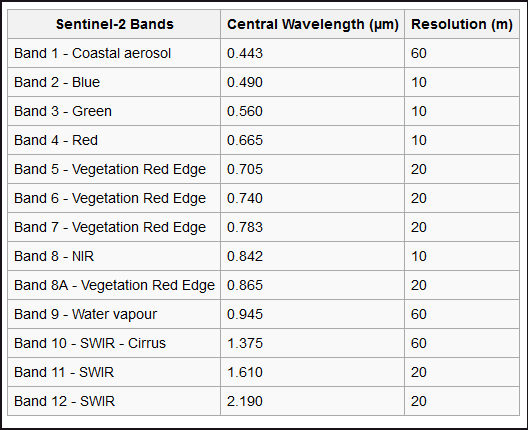

In [120]:
df_ndvi = pd.read_csv("data/train/NDVI.csv", encoding="windows-1251").drop(columns=["index"])

In [121]:
days = list(df_ndvi.select_dtypes(include="number"))
for day in days:
    df_ndvi[day] = df_ndvi[day].fillna(df_ndvi[day].mean())

df_ndvi.isna().sum()


121        0
128        0
135        0
142        0
149        0
156        0
163        0
170        0
177        0
184        0
191        0
198        0
205        0
212        0
219        0
226        0
233        0
240        0
247        0
254        0
261        0
268        0
275        0
282        0
289        0
296        0
culture    0
dtype: int64

In [122]:
pivot = pd.pivot_table(df_ndvi, df_ndvi.select_dtypes(include="number"), "culture")
pivot

,121,128,135,142,149,156,163,170,177,184,...,233,240,247,254,261,268,275,282,289,296
culture,,,,,,,,,,,,,,,,,,,,,
залежь,0.230916,0.280619,0.367859,0.488283,0.582498,0.652679,0.681818,0.717440,0.725158,0.765482,...,0.741362,0.741469,0.720115,0.694697,0.655198,0.586695,0.491828,0.455392,0.359882,0.362023
зерновые,0.223676,0.207941,0.249734,0.258973,0.305928,0.393925,0.568195,0.583088,0.636132,0.647037,...,0.479542,0.504653,0.472780,0.411360,0.417409,0.424599,0.422544,0.444484,0.405379,0.380566
кукуруза,0.232768,0.239185,0.240176,0.260085,0.240954,0.223868,0.237927,0.268302,0.337058,0.411696,...,0.789975,0.850020,0.739839,0.520435,0.417042,0.339335,0.317167,0.290195,0.273450,0.236373
многолетние травы,0.288581,0.369720,0.447072,0.548372,0.624637,0.654058,0.705478,0.749385,0.727266,0.672341,...,0.781730,0.762278,0.749791,0.724035,0.713292,0.698858,0.624292,0.659091,0.570079,0.570607
овощи,0.213154,0.227626,0.240123,0.236378,0.236910,0.266411,0.289142,0.295250,0.421102,0.473484,...,0.734859,0.752257,0.556655,0.448634,0.417798,0.320727,0.321058,0.308741,0.271171,0.222406
соя,0.239310,0.261209,0.293363,0.327179,0.338155,0.311700,0.321641,0.349529,0.441256,0.482526,...,0.851000,0.885028,0.834925,0.732190,0.617379,0.500579,0.442310,0.423946,0.358496,0.317265


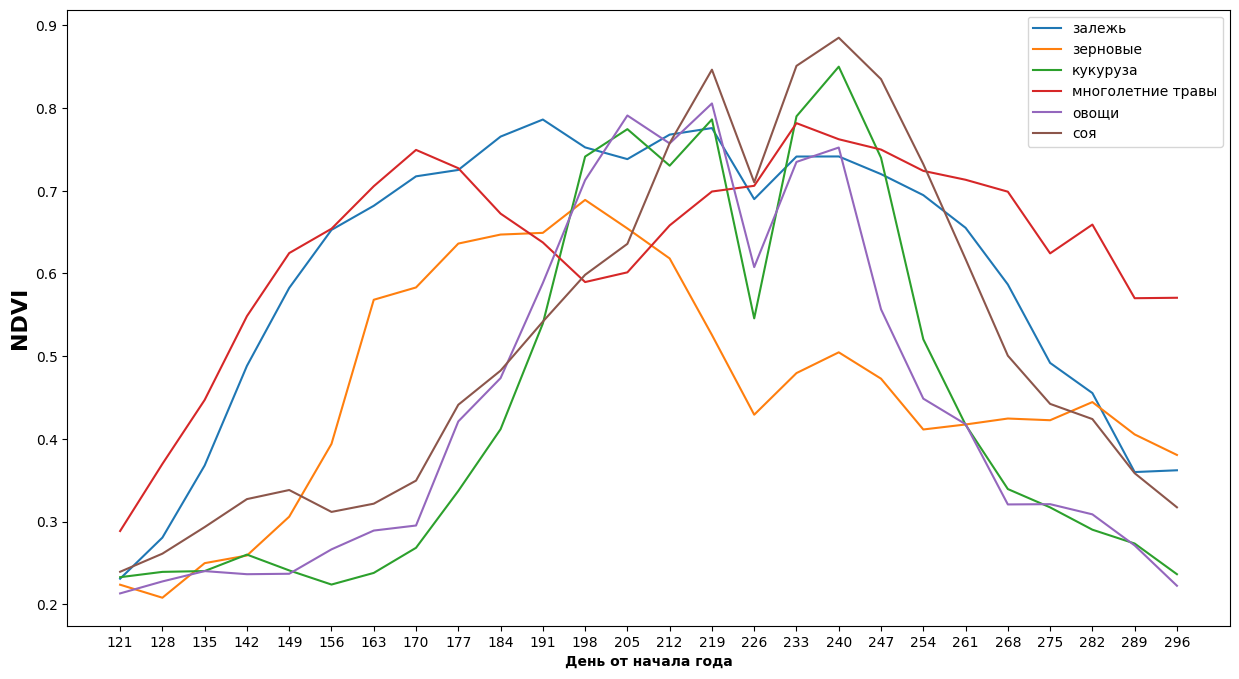

In [123]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_xlabel('День от начала года',fontsize = 10,fontweight="bold")
ax.set_ylabel('NDVI',fontsize = 16,fontweight="bold")

for culture in pivot.index:
    ax.plot(list(pivot), pivot.loc[culture], label=culture)
ax.legend()

In [124]:
df_nir = pd.read_csv("data/train/B8A.csv", encoding="windows-1251").drop(columns=["index"])
df_swir = pd.read_csv("data/train/B12.csv", encoding="windows-1251").drop(columns=["index"])
df_red = pd.read_csv("data/train/B04.csv", encoding="windows-1251").drop(columns=["index"])
df_VegRedEdge = pd.read_csv("data/train/B05.csv", encoding="windows-1251").drop(columns=["index"])
df_blue = pd.read_csv("data/train/B02.csv", encoding="windows-1251").drop(columns=["index"])
df_green = pd.read_csv("data/train/B03.csv", encoding="windows-1251").drop(columns=["index"])

for day in days:
    df_nir[day] = df_nir[day].fillna(df_nir[day].mean())
    df_swir[day] = df_swir[day].fillna(df_swir[day].mean())
    df_red[day] = df_red[day].fillna(df_red[day].mean())
    df_green[day] = df_green[day].fillna(df_green[day].mean())
    df_VegRedEdge[day] = df_VegRedEdge[day].fillna(df_VegRedEdge[day].mean())
    df_blue[day] = df_blue[day].fillna(df_blue[day].mean())

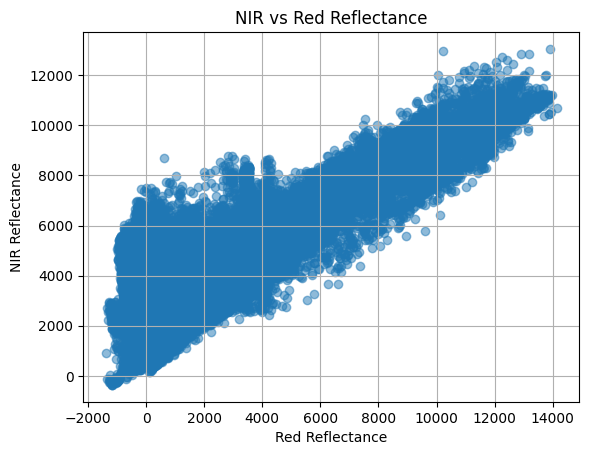

In [125]:
# Для TSAVI

# Объединение всех значений NIR и Red для построения графика
all_nir = pd.concat([df_nir[day] for day in days])
all_red = pd.concat([df_red[day] for day in days])

# Построение графика
plt.scatter(all_red, all_nir, alpha=0.5)
plt.xlabel('Red Reflectance')
plt.ylabel('NIR Reflectance')
plt.title('NIR vs Red Reflectance')
plt.grid(True)
plt.show()

mask = all_red < 0.3
x = all_red[mask]
y = all_nir[mask]

# Выполняем линейную регрессию
slope, intercept = np.polyfit(x, y, 1)

# Получаем значения a и s
a = intercept  # координата пересечения с осью NIR
s = slope      # наклон почвенной линии




In [126]:
# Для SAWI
L = pd.DataFrame()

for day in days:
    discriminant = (2 * df_nir[day] + 1) * (2 * df_nir[day] + 1) - 8 * (df_nir[day] * df_red[day])
    sqrt_value = np.sqrt(np.maximum(discriminant, 0))  
    L[f"{day}_L"] = 1 - (2 * df_nir[day] + 1 - sqrt_value) / 2
    L[f"{day}_L"] = L[f"{day}_L"].fillna(L[f"{day}_L"].mean())  


In [127]:
# Для GEMI
E = pd.DataFrame()

for day in days:
    E[f"{day}_E"] = (2 * (df_nir[day] * df_nir[day] - df_red[day] * df_red[day]) + 1.5 * df_nir[day] + 0.5 * df_red[day]) / (df_nir[day] + df_red[day] + 0.5)

In [128]:
#Для ARVI (a = 1, но при малом покрытии растительности и неизвестном типе атмосферы a = 0,5)

Rb=pd.DataFrame()
a = 1
for day in days:
    Rb[f"{day}_Rb"] = df_red[day] - a * (df_red[day] - df_blue[day])


In [133]:
df_ndwi = pd.DataFrame()
df_new = pd.DataFrame()
df_SAWI = pd.DataFrame()
df_GEMI = pd.DataFrame()
df_ARVI = pd.DataFrame()
df_NDRE = pd.DataFrame()
df_GNDWI = pd.DataFrame()
df_EVI = pd.DataFrame()
df_MSAVI =pd.DataFrame()

for day in days:
    df_ndwi[f"{day}_NDWI"] = (df_nir[day] - df_swir[day]) / (df_nir[day] + df_swir[day])
    df_new[f"{day}_NEW"] = df_ndvi[day] * df_ndwi[f"{day}_NDWI"]
    df_ARVI[f"{day}_ARVI"] = (df_nir[day] - Rb[f"{day}_Rb"]) / (df_nir[day] + Rb[f"{day}_Rb"])
    df_SAWI[f"{day}_SAWI"] = (df_nir[day] - df_red[day]) / (df_nir[day] + df_red[day] - L[f"{day}_L"]) * (1 + L[f"{day}_L"])
    df_GEMI[f"{day}_GEMI"] = E[f"{day}_E"] * (1 - 0.25 * E[f"{day}_E"]) - ((df_red[day] - 0.125) / (1 - df_red[day]))
    df_NDRE[f"{day}_NDRE"] = (df_nir[day] - df_VegRedEdge[day]) / (df_nir[day] + df_VegRedEdge[day])
    df_GNDWI[f"{day}_GNDWI"] = (df_nir[day] - df_green[day]) / (df_nir[day] + df_green[day])
    df_EVI[f"{day}_EVI"] = 2.5* (df_nir[day]-df_red[day])/(df_nir[day]+6*df_red[day]-7.5*df_blue[day]+1)
    msavi_expression = (2 * df_nir[day] + 1) * (2 * df_nir[day] + 1) - 8 * (df_nir[day] - df_red[day])
    # Для MSAVI
    msavi_expression = (2 * df_nir[day] + 1) * (2 * df_nir[day] + 1) - 8 * (df_nir[day] - df_red[day])

    # Использование абсолютного значения
    df_MSAVI[f"{day}_MSAVI"] = (2 * df_nir[day] + 1 - np.sqrt(np.abs(msavi_expression)))

In [144]:
df_features = pd.concat([df_ndvi, df_ndwi,df_GNDWI,df_SAWI,df_NDRE,df_EVI,df_MSAVI,df_GEMI,df_ARVI], axis=1)

df_features.head()

,121,128,135,142,149,156,163,170,177,184,...,233_ARVI,240_ARVI,247_ARVI,254_ARVI,261_ARVI,268_ARVI,275_ARVI,282_ARVI,289_ARVI,296_ARVI
0,0.254240,0.232287,0.249031,0.254652,0.254277,0.356323,0.302102,0.261997,0.293335,0.243043,...,0.199834,0.263397,1.233033,0.115910,0.769602,0.725550,0.804584,1.653115,0.021366,0.037638
1,0.226222,0.267632,0.287176,0.212295,0.193222,0.219783,0.300802,0.356491,0.443714,0.562010,...,-0.008900,0.258942,1.463318,0.633412,0.659795,0.703940,0.653157,2.056439,0.006529,0.842230
2,0.196713,0.185725,0.140135,0.191388,0.163758,0.373368,0.302102,0.195013,0.231862,0.180890,...,0.175560,0.277931,1.256766,0.143920,0.766487,0.622787,0.798306,1.889774,0.027245,0.221690
3,0.186567,0.115344,0.144401,0.159283,0.136875,0.175118,0.302102,0.188756,0.220256,0.168195,...,0.196508,0.272626,1.239952,0.171991,0.756688,0.614810,0.790572,1.989278,0.037106,0.099880
4,0.218304,0.214468,0.212592,0.264833,0.251726,0.221614,0.234553,0.260465,0.317564,0.435179,...,0.141425,0.229957,0.617583,0.264835,0.704638,0.785172,0.493562,3.591406,0.015543,0.034330


In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder()

x = df_features.drop(columns=["culture"])
# y = pd.DataFrame(encoder.fit_transform(df_features[['culture']]).toarray(), columns=encoder.get_feature_names_out(['culture']))
y = df_features["culture"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  

from sklearn.svm import SVC
# from sklearn.linear_model import PassiveAggressiveClassifier
forest_config = {
    "n_estimators":300,
    "max_depth": 30,
    "min_samples_split": 5,
    "min_samples_leaf": 2,
    "max_features": "sqrt",
    "bootstrap": False,
}

forest_model = RandomForestClassifier(**forest_config)
clfs = [forest_model, HistGradientBoostingClassifier(),GradientBoostingClassifier()]
for clf in clfs:
    clf.fit(x_train, y_train)

In [151]:
answers = []
ans_df = pd.DataFrame()
for clf in clfs:
    ans = clf.predict(x_test)
    ans_df[type(clf).__name__] = ans
    answers.append(ans)
    
ans_df.mode(axis=1)

,0,1,2
0,многолетние травы,NaN,NaN
1,залежь,NaN,NaN
2,овощи,NaN,NaN
3,кукуруза,NaN,NaN
4,кукуруза,NaN,NaN
...,...,...,...
2174,кукуруза,NaN,NaN
2175,зерновые,NaN,NaN
2176,соя,NaN,NaN
2177,овощи,NaN,NaN


In [152]:
def row_mode(row):
    return row.mode()[0]

ans_df["Mode"] = ans_df.apply(row_mode, axis=1)


In [153]:
from sklearn.metrics import classification_report, f1_score

for clf in list(ans_df):
    print(clf, classification_report(y_test, ans_df[clf], digits=5), sep="\n")


RandomForestClassifier
                   precision    recall  f1-score   support

           залежь    0.96700   0.98986   0.97830       296
         зерновые    0.99468   0.97650   0.98551       383
         кукуруза    1.00000   0.99437   0.99718       355
многолетние травы    0.99095   0.99320   0.99207       441
            овощи    0.98819   0.99603   0.99209       252
              соя    0.98670   0.98451   0.98560       452

         accuracy                        0.98853      2179
        macro avg    0.98792   0.98908   0.98846      2179
     weighted avg    0.98862   0.98853   0.98854      2179

HistGradientBoostingClassifier
                   precision    recall  f1-score   support

           залежь    0.97351   0.99324   0.98328       296
         зерновые    0.98691   0.98433   0.98562       383
         кукуруза    1.00000   0.99718   0.99859       355
многолетние травы    0.98871   0.99320   0.99095       441
            овощи    0.99209   0.99603   0.99406       25